<h1>Stock Price Prediction Time Series using ARIMA</h1>
<p>This project focuses on predicting stock prices using the Autoregressive Integrated Moving Average (ARIMA) model. Time series analysis and ARIMA modeling are employed to forecast future stock prices based on historical data.</p>

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.api as sm

In [4]:
data = pd.read_csv("C:\\Users\\DELL\\Desktop\\DS\\Datasets\\ADANIPORTS.csv")
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741


### Data Cleaning 

In [10]:
Stockdata = data.dropna()

Stockdata.index = pd.to_datetime(Stockdata.Date)

Stockdata = Stockdata['Prev Close']['2013-01-01': '2013-12-02']
Stockdata.describe()

count    230.000000
mean     144.279565
std        9.389983
min      121.950000
25%      138.500000
50%      145.725000
75%      150.700000
max      168.250000
Name: Prev Close, dtype: float64

### Data Exploration

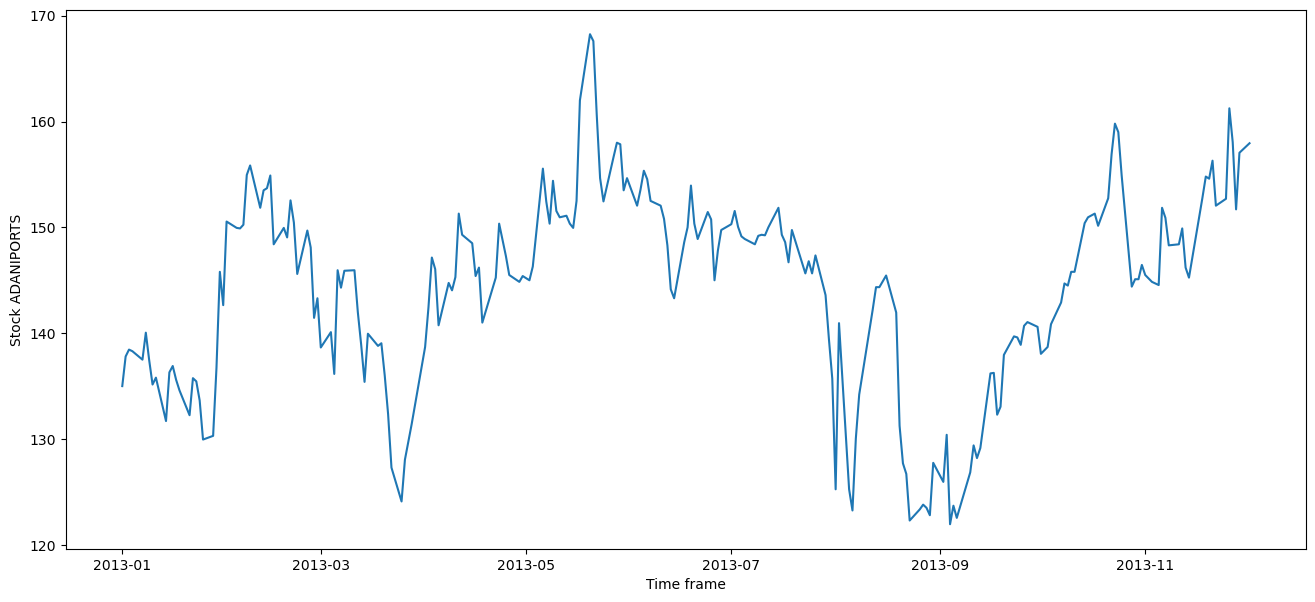

In [11]:
plt.figure(figsize = (16, 7))
plt.xlabel("Time frame")
plt.ylabel("Stock ADANIPORTS")
plt.plot(Stockdata)

## Checking stationarity:

Methods 1: Rolling statistics 

Methods 2: Augmented Dickey fuller(ADF)
        

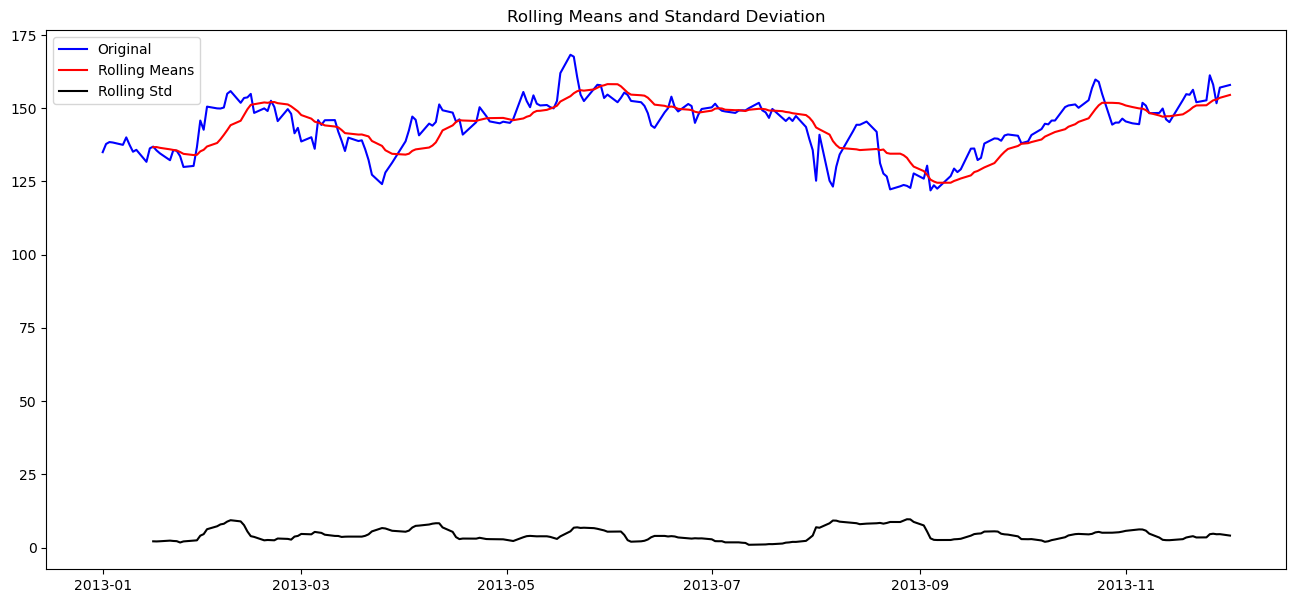

In [16]:
# 1- Rolling statistics
rollmeans = Stockdata.rolling(12).mean()
rollstd = Stockdata.rolling(12).std()

plt.figure(figsize = (16, 7))

# Plot rolling statistics
org = plt.plot(Stockdata, color = 'blue', label = 'Original')
mean = plt.plot(rollmeans, color = 'red', label = 'Rolling Means')
std = plt.plot(rollstd, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Means and Standard Deviation')
plt.show(block = False)

In [25]:
# 2- ADF test
addfuller_result = adfuller(Stockdata, autolag= 'AIC')

print(f'ADF Statistics: {addfuller_result[0]}')
print(f'p-value: {addfuller_result[1]}')

for key, value in addfuller_result[4].items():
    print('Critical values: ')
    print(f'{key}, {value}')

ADF Statistics: -3.055033382718003
p-value: 0.03006489096689996
Critical values: 
1%, -3.4592326027153493
Critical values: 
5%, -2.8742454699025872
Critical values: 
10%, -2.5735414688888465


### make Series Stationary

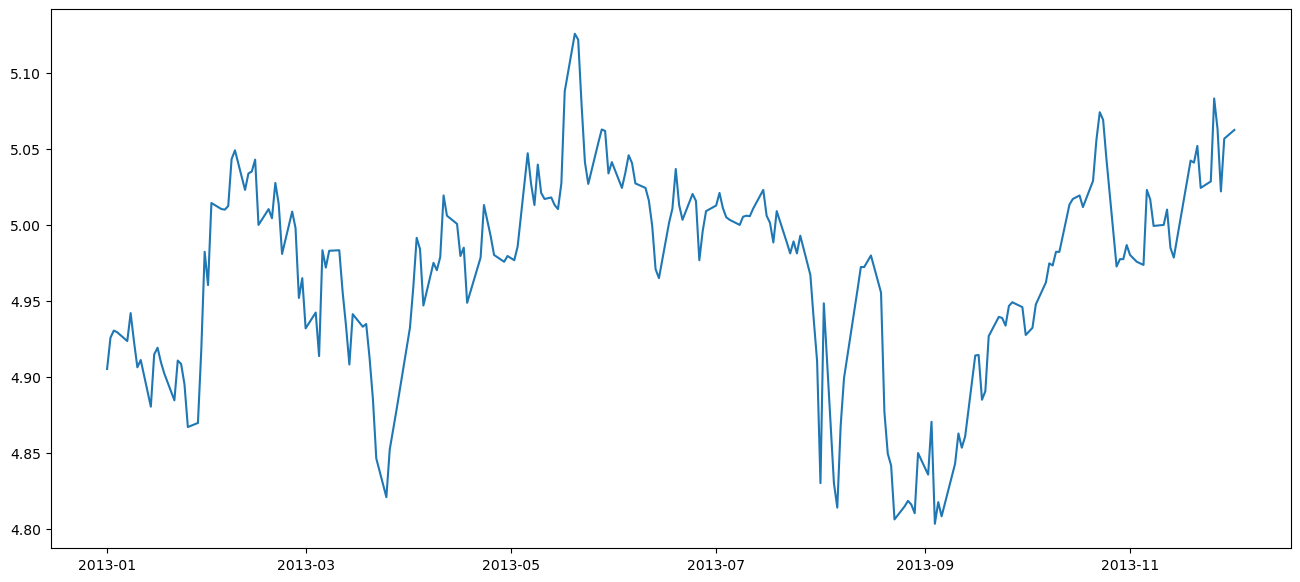

In [27]:
plt.figure(figsize = (16, 7))
ts_log = np.log(Stockdata)
plt.plot(ts_log)

### Decomposition to check that is data is not stationary

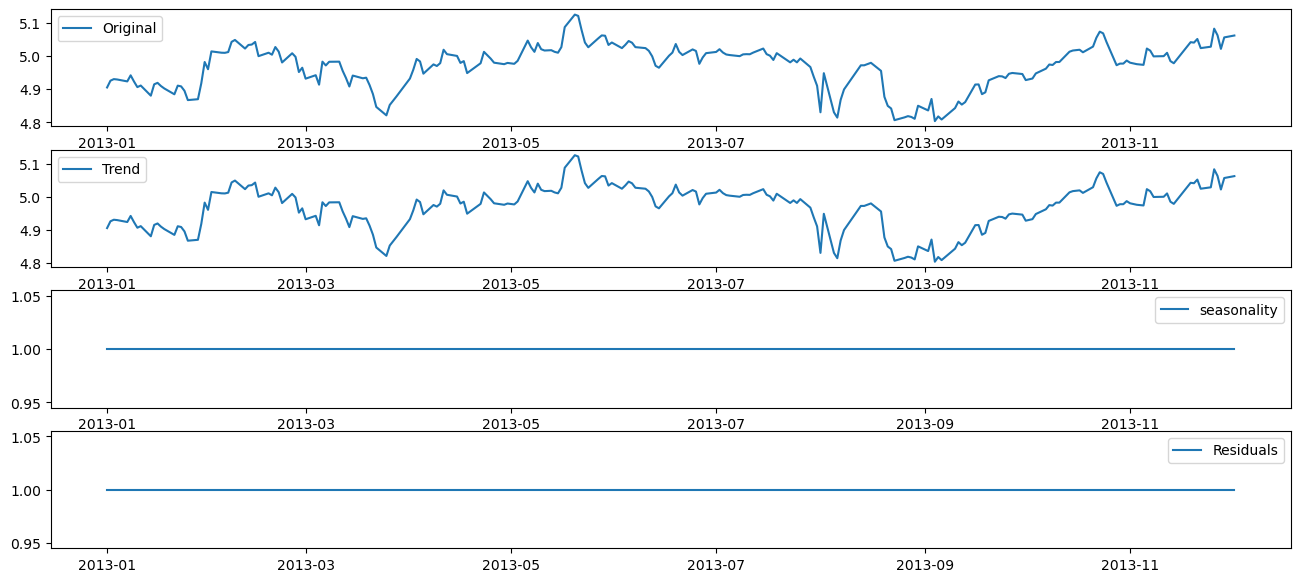

In [34]:
# Decomposition
decomposition = seasonal_decompose(ts_log, period = 1, model = 'muliplicative')
trend = decomposition.trend
seasonal = decomposition.seasonal
resid = decomposition.resid

plt.figure(figsize = (16, 7))
fig = plt.figure(1)

plt.subplot(411)
plt.plot(ts_log, label = 'Original')
plt.legend(loc = 'best')

plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

plt.subplot(413)
plt.plot(seasonal, label = 'seasonality')
plt.legend(loc = 'best')

plt.subplot(414)
plt.plot(resid, label = 'Residuals')
plt.legend(loc = 'best')

### differencing - is used to make the dataset  stationary

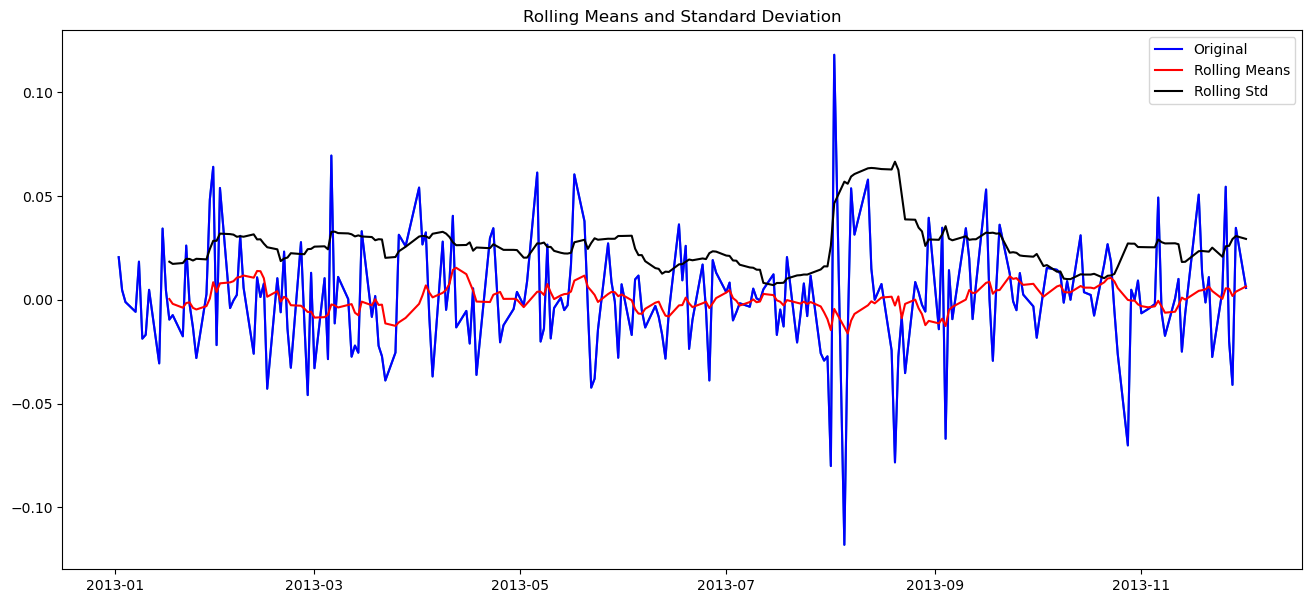

In [40]:
plt.figure(figsize = (16, 7))
fig = plt.figure(1)
ts_log_dif = ts_log - ts_log.shift()
plt.plot(ts_log_dif)

# Determing Rolling Statistics
rollmeans = ts_log_dif.rolling(12).mean()
rollstd = ts_log_dif.rolling(12).std()

# Plot rolling statistics
org = plt.plot(ts_log_dif, color = 'blue', label = 'Original')
mean = plt.plot(rollmeans, color = 'red', label = 'Rolling Means')
std = plt.plot(rollstd, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Means and Standard Deviation')
plt.show(block = False)

In [44]:
Stockdata.sort_index(inplace= True)

### acf, pcaf -- used to determine the order of AR and MA

In [46]:
lag_acf = acf(ts_log_dif, nlags= 20)
lag_pacf = pacf(ts_log_dif, nlags= 20)

E:\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


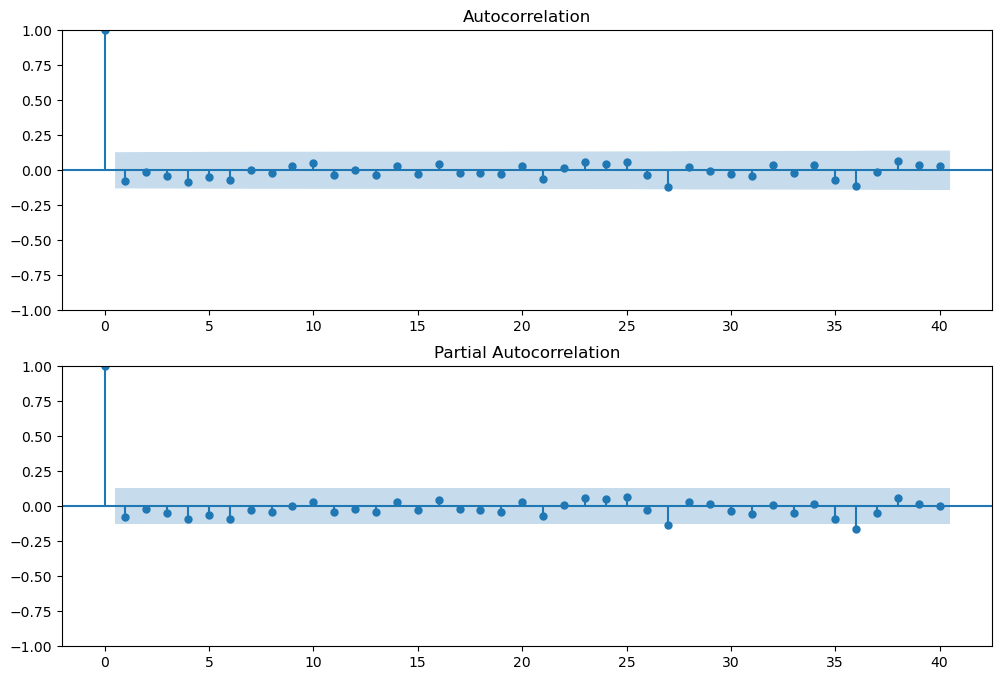

In [49]:
fig = plt.figure(figsize= (12, 8))
ax1 = plt.subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_log_dif.dropna(), lags = 40, ax = ax1)
ax2 = plt.subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_log_dif.dropna(), lags= 40, ax = ax2)

E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
E:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
E:\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


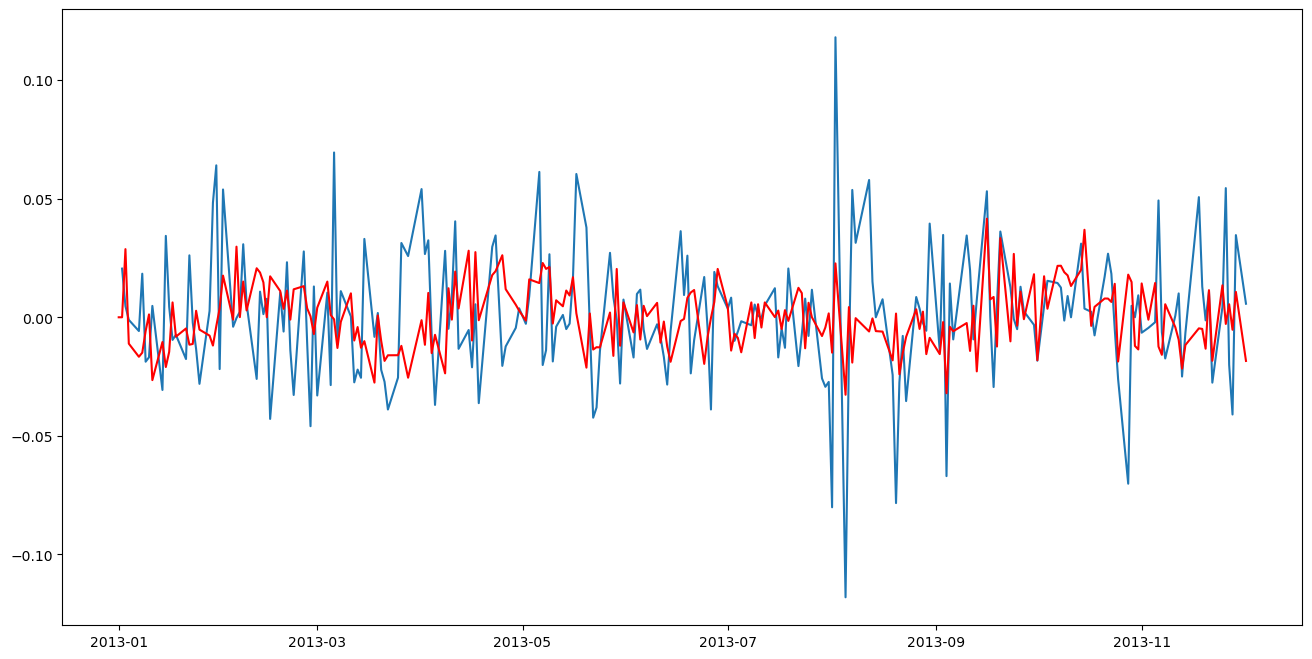

In [92]:
model = ARIMA(ts_log_dif, order = (27, 2, 27))
result_ARIMA = model.fit()

plt.figure(figsize = (16, 8))
plt.plot(ts_log_dif)
plt.plot(result_ARIMA.fittedvalues, color = 'red')

### Taking Result back to original scale

In [93]:
ARIMA_diff_prediction = pd.Series(result_ARIMA.fittedvalues, copy = True)
ARIMA_diff_prediction.head()

Date
2013-01-01    0.000000
2013-01-02    0.000000
2013-01-03    0.028740
2013-01-04   -0.011117
2013-01-07   -0.016655
dtype: float64

In [94]:
#difference the time series
ARIMA_diff_prediction_cumsum = ARIMA_diff_prediction.cumsum()
ARIMA_diff_prediction_cumsum.head()

Date
2013-01-01    0.000000
2013-01-02    0.000000
2013-01-03    0.028740
2013-01-04    0.017623
2013-01-07    0.000968
dtype: float64

In [95]:
ARIMA_log_prediction = pd.Series(ts_log.iloc[0], index = ts_log.index)
ARIMA_log_prediction = ARIMA_log_prediction.add(ARIMA_diff_prediction_cumsum, fill_value = 0)
ARIMA_log_prediction.head()

Date
2013-01-01    4.905275
2013-01-02    4.905275
2013-01-03    4.934015
2013-01-04    4.922898
2013-01-07    4.906243
dtype: float64

Text(0.5, 1.0, 'RMSE: 12.7011')

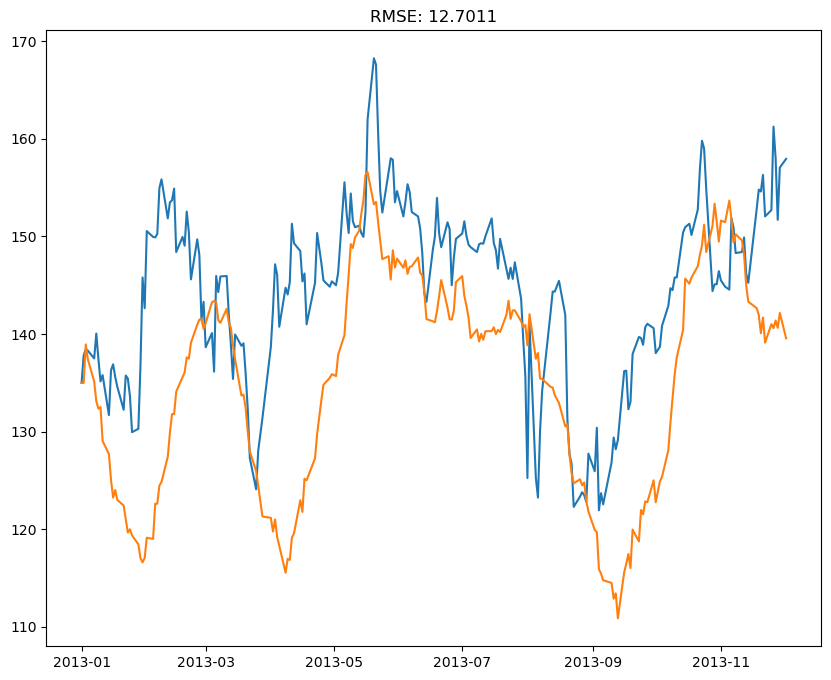

In [96]:
plt.figure(figsize = (10, 8))
prediction_ARIMA = np.exp(ARIMA_log_prediction)
plt.plot(Stockdata)
plt.plot(prediction_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((prediction_ARIMA - Stockdata) ** 2)/len(Stockdata)))

In [76]:
result_ARIMA.predict(10, 20)

Date
2013-01-15   -0.000206
2013-01-16    0.001834
2013-01-17    0.003331
2013-01-18    0.000737
2013-01-21   -0.001059
2013-01-22    0.002303
2013-01-23   -0.005339
2013-01-24    0.003139
2013-01-25   -0.000820
2013-01-28   -0.003150
2013-01-29    0.000729
Name: predicted_mean, dtype: float64

In [ ]:
import pmdarima as pm

def arimamodel(timeseries):
    automodel = pm.auto_arima(timeseries,
               start_p = 3,
               start_q = 3,
               max_p = 5,
               max_q = 5,
               test = 'adf',
               seasonal = True,
               trace = True)
    return automodel

In [ ]:
arimamodel(ts_log)